In [60]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(12,8)})

In [61]:
defination = pd.read_csv("/content/Customer+Churn+Data_definations.csv")
pd.set_option('display.max_colwidth', None)

defination

,Variable,Description
0,AccountID,account unique identifier
1,Churn,account churn flag (Target)
2,Tenure,Tenure of account
3,City_Tier,Tier of primary customer's city
4,CC_Contacted_L12m,How many times all the customers of the account has contacted customer care in last 12months
5,Payment,Preferred Payment mode of the customers in the account
6,Gender,Gender of the primary customer of the account
7,Service_Score,Satisfaction score given by customers of the account on service provided by company
8,Account_user_count,Number of customers tagged with this account
9,account_segment,Account segmentation on the basis of spend


##### Import CSV rawdata for Churn Prediction and read the available features

In [62]:
# Import and define the dataframe
df = pd.read_csv("Customer+Churn+Data.csv")
df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180,Computer


##### Inorder to avoid direct modifications and noise in the original file, create copy of the data|

In [63]:
# Inorder to avoid loss of original date, create a copy of the dataframe
df1 = df.copy()

##### Basic Data Understanding :

- Understand the descriptive part of data : Count, Quantiles, standard Deviation
- Understand the datatypes, Identify null values count, Null Value percentage,possible Unique values of each variable

In [64]:
df1.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [65]:
# basic info on column name,non_null count and it's data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [66]:
# Aggregated view of count of nonnull values, count oif null values, null values percentage
#variable datatype and unique count of tuples in dataset of each variable

null_counts= df1.isnull().sum(axis=0)
total_cells = len(df1) * len(df1.columns)
null_percentages = round((null_counts / total_cells)*100,2)
object_type = df1.dtypes
unique_count = df1.nunique()
count = df1.count()



pd.DataFrame({'Non_null_count': count,'Null_Count': null_counts, 'Null_percentage': null_percentages, 'Object_type':object_type, 'Unique_count' : unique_count},index= df1.columns)

,Non_null_count,Null_Count,Null_percentage,Object_type,Unique_count
AccountID,11260,0,0.00,int64,11260
Churn,11260,0,0.00,int64,2
Tenure,11158,102,0.05,object,38
City_Tier,11148,112,0.05,float64,3
CC_Contacted_LY,11158,102,0.05,float64,44
Payment,11151,109,0.05,object,5
Gender,11152,108,0.05,object,4
Service_Score,11162,98,0.05,float64,6
Account_user_count,11148,112,0.05,object,7
account_segment,11163,97,0.05,object,7


#### Drop Uneccessary features that are irrelevent for Churn Prediction Analysis ( This is subjective and based on experience). However, the variables can be reconsidered based on further model details

In [67]:
# Drop The features which is irrelevent for the analysis:

df1 = df1.drop(['AccountID','CC_Contacted_LY','CC_Agent_Score','coupon_used_for_payment','Day_Since_CC_connect','cashback','CC_Contacted_LY'], axis=1)

<h2><u> Data Cleaning</u></h2>

### Handling Missing values through Imputation
- Imputation: Techniques like mean/median imputation, mode imputation, or more sophisticated methods like KNN (K-Nearest Neighbors) imputation can fill missing values with estimated values based on other data points.
- Deletion: If missing values are a small proportion of the data and not randomly distributed, removing rows or columns with missing entries might be acceptable, but be cautious of losing information.

### Inconsistency Correction:

- Identifying and correcting typos or spelling errors in text data can improve the quality and consistency of your data.
- Formatting inconsistencies: Standardizing date formats, currency formats, etc., ensures the data is interpreted uniformly.
- Correction of Datatypes

### Text mining:

- Lowercasing: Converting all text to lowercase ensures consistency and avoids treating "Text" and "text" as different features.
- Punctuation Removal: Removing punctuation marks like commas, periods, etc., can simplify text analysis.
- Stop Word Removal: Removing common words like "the", "a", "an", etc., that don't carry much meaning can improve the focus on relevant content in the text data.
- Stemming/Lemmatization: Reducing words to their base form (e.g., "running" to "run" or "studies" to "study") can help capture synonyms and improve model performance.

### Observations in Churn Prediction Data and Solutions offered

#### 1. We observe more than 5% of missing data
   Approach:
   - Numeric Variables : Imputation using mean
   - Categorical Variables : Imputation by filling na to  mode and median values
   - methods : df.fillna(df.mode()[0]) or df.fillna(df.median()) or df.fillna('Otherdata')
#### 2. Mix of categorical varibles and Numeric Variables has Noise in the Data
   Approach :
   - Identify the variables that's creating noise
   - Replace the incorrect characters, symbols, non-standard terminologies
   - Methods : df.replace()
#### 3. Multiple variables has incorrect datatypes
   Approach:
   - Convert datatypes to right format.
   - Method : pd.to_numeric(), df.astype()




In [68]:
s = {'#':'0','$':'0','*':'0','+':'0','&&&&':'0','@':'0'}
col = ['Tenure','Account_user_count','rev_per_month','rev_growth_yoy']

# Regular expression to match special characters
special_char_pattern = r"[^\w\s]"  # Matches anything except letters, numbers, or whitespace

# Function to clean a single column
def clean_column(df1, col):
    # Replace special characters with 0 using regular expression
    df1[col] = df1[col].replace(to_replace=special_char_pattern, regex=True, value=0)
    return df1

# Clean the specified columns
for c in col:
    df1 = clean_column(df1.copy(), col)

#df1["Day_Since_CC_connect"].to_excel('exported_data.xlsx', sheet_name='Sheet1')

In [69]:
df1['rev_per_month'] = pd.to_numeric(df1['rev_per_month'], errors='coerce')
df1['rev_per_month'] = df1['rev_per_month'].fillna(df1['rev_per_month'].mean())
df1["rev_per_month"] = df1["rev_per_month"].astype(int)

df1['rev_growth_yoy'] = pd.to_numeric(df1['rev_growth_yoy'], errors='coerce')
df1['rev_growth_yoy'] = df1['rev_growth_yoy'].fillna(df1['rev_growth_yoy'].mean())
df1["rev_growth_yoy"] = df1["rev_growth_yoy"].astype(int)

df1["Service_Score"] = df1["Service_Score"].fillna(df1["Service_Score"].mean())
df1["Service_Score"] = df1["Service_Score"].astype(int)

df1["City_Tier"] = df1["City_Tier"].fillna(df1["City_Tier"].mean())
df1["City_Tier"] = df1["City_Tier"].astype(int)

In [70]:
# Way to Replace multiple values of the column
mapped = {'F':'F','M':'M','Female':'F','Male':'M','Regular +': 'Regular Plus', 'Super +':'Super Plus'}
df1[["Gender","account_segment"]] = df1[["Gender","account_segment"]].replace(mapped)

#Fill null values using mode Imputation
df1["Gender"] = df1["Gender"].fillna(df1["Gender"].mode()[0])
df1["account_segment"] = df1["account_segment"].fillna(df1["account_segment"].mode()[0])
df1["Complain_ly"] = df1["Complain_ly"].fillna(df1["Complain_ly"].mode()[0])

df1["Account_user_count"] = df1["Account_user_count"].fillna(df1["Account_user_count"].mode()[0])
df1["Account_user_count"] = df1["Account_user_count"].astype(int)

df1["Tenure"] = df1["Tenure"].fillna(df1["Tenure"].mode()[0])
df1["Tenure"] = df1["Tenure"].astype(int)

df1["Complain_ly"] = df1["Complain_ly"].fillna(df1["Complain_ly"].mode()[0])
df1["Complain_ly"] = df1["Complain_ly"].astype(int)

In [71]:
col = ['Payment','Marital_Status', 'Login_device']

df1[col] = df1[col].fillna('Unknown')

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Churn               11260 non-null  int64 
 1   Tenure              11260 non-null  int64 
 2   City_Tier           11260 non-null  int64 
 3   Payment             11260 non-null  object
 4   Gender              11260 non-null  object
 5   Service_Score       11260 non-null  int64 
 6   Account_user_count  11260 non-null  int64 
 7   account_segment     11260 non-null  object
 8   Marital_Status      11260 non-null  object
 9   rev_per_month       11260 non-null  int64 
 10  Complain_ly         11260 non-null  int64 
 11  rev_growth_yoy      11260 non-null  int64 
 12  Login_device        11260 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


<Figure size 1200x800 with 0 Axes>

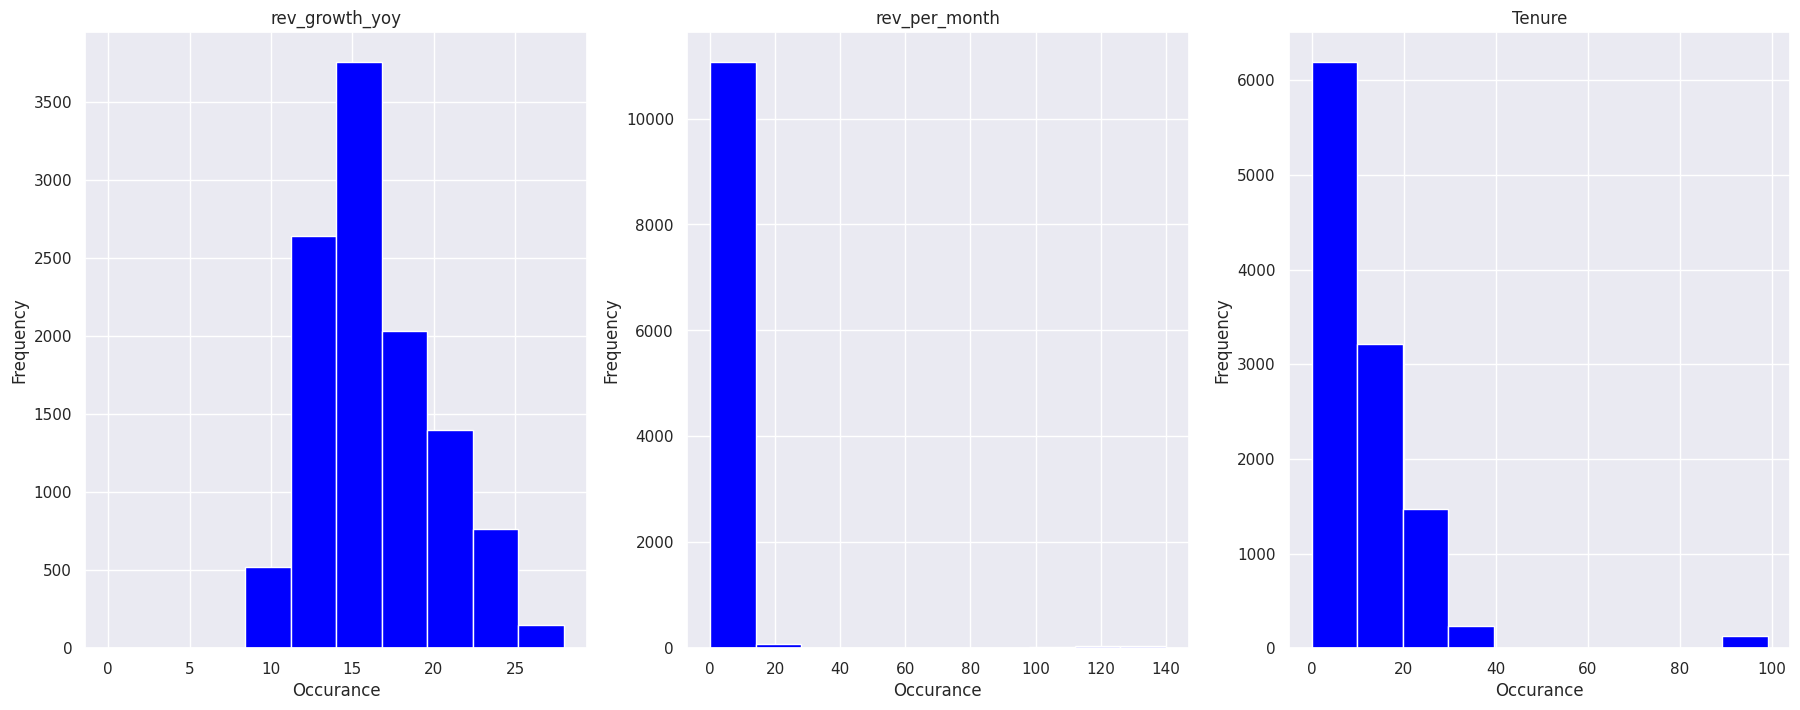

In [73]:
# Distribution of Continues Features

fig = plt.figure()
fig,axes1 = plt.subplots(nrows = 1, ncols =3, figsize = (22,8));

axes1[0].set(xlabel = "Occurance",
        ylabel = "Frequency",
        title = "rev_growth_yoy");
axes1[0].hist(df1.rev_growth_yoy,color ="blue");

axes1[1].set(xlabel = "Occurance",
        ylabel = "Frequency",
        title = "rev_per_month");
axes1[1].hist(df1.rev_per_month,color ="blue");

axes1[2].set(xlabel = "Occurance",
        ylabel = "Frequency",
        title = "Tenure");
axes1[2].hist(df1.Tenure,color ="blue");

The above continues Feature "rev_per_month" & "rev_growth_yoy" shows sckewness by clearly explaining there is outliers.

### The below are the method that can be implimented to handle outliers:

##### Winsorization using IQR:
Calculates the 1st and 3rd quartiles (q1, q3) and the interquartile range (IQR). Defines lower and upper bounds based on 1.5 times IQR from q1 and q3. Replaces values below the lower bound with the lower bound and values above the upper bound with the upper bound.

##### Capping at a Maximum Value:
Sets a maximum plausible tenure value (e.g., 20 years). Uses clip function to limit the tenure values to be less than or equal to the maximum.

##### Logarithmic Transformation:
Adds 1 to the tenure values to avoid taking the logarithm of 0. Applies the logarithmic transformation to create a new "log_tenure" column.

##### For the current situation, Using Winsorization Method to treat the Outliers of Continues Variables

In [74]:
#Here's an example Python code demonstrating different approaches to handle
import pandas as pd
from scipy import stats

#1. Winsorization using IQR:
def winsorize_iqr(df1, column):
    q1 = df1[column].quantile(0.25)
    q3 = df1[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df1.loc[df1[column] < lower_bound, column] = lower_bound
    df1.loc[df1[column] > upper_bound, column] = upper_bound
    return df1
df1 = winsorize_iqr(df1, 'rev_growth_yoy')
df1 = winsorize_iqr(df1, 'rev_per_month')


#Rough Check on Quantile parameters
# q1 = df1['Tenure'].quantile(0.25)
# q3 = df1['Tenure'].quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr
# df1.loc[df1['Tenure'] < lower_bound, 'Tenure'] = lower_bound
# df1.loc[df1['Tenure'] > upper_bound, 'Tenure'] = upper_bound
# print(q1,q3,iqr,lower_bound,upper_bound)



#2. Capping at a Maximum Value:
# max_tenure = 36  # Assuming maximum plausible tenure is 36 years
# df1['Tenure'] = df1['Tenure'].clip(upper=max_tenure)


#3. Logarithmic Transformation:
# df1['Tenure'] = np.log(df1['Tenure'] + 1)  # Add 1 to avoid log(0)
# df1

##### Distribution After Outlier Treatment

<Figure size 1200x800 with 0 Axes>

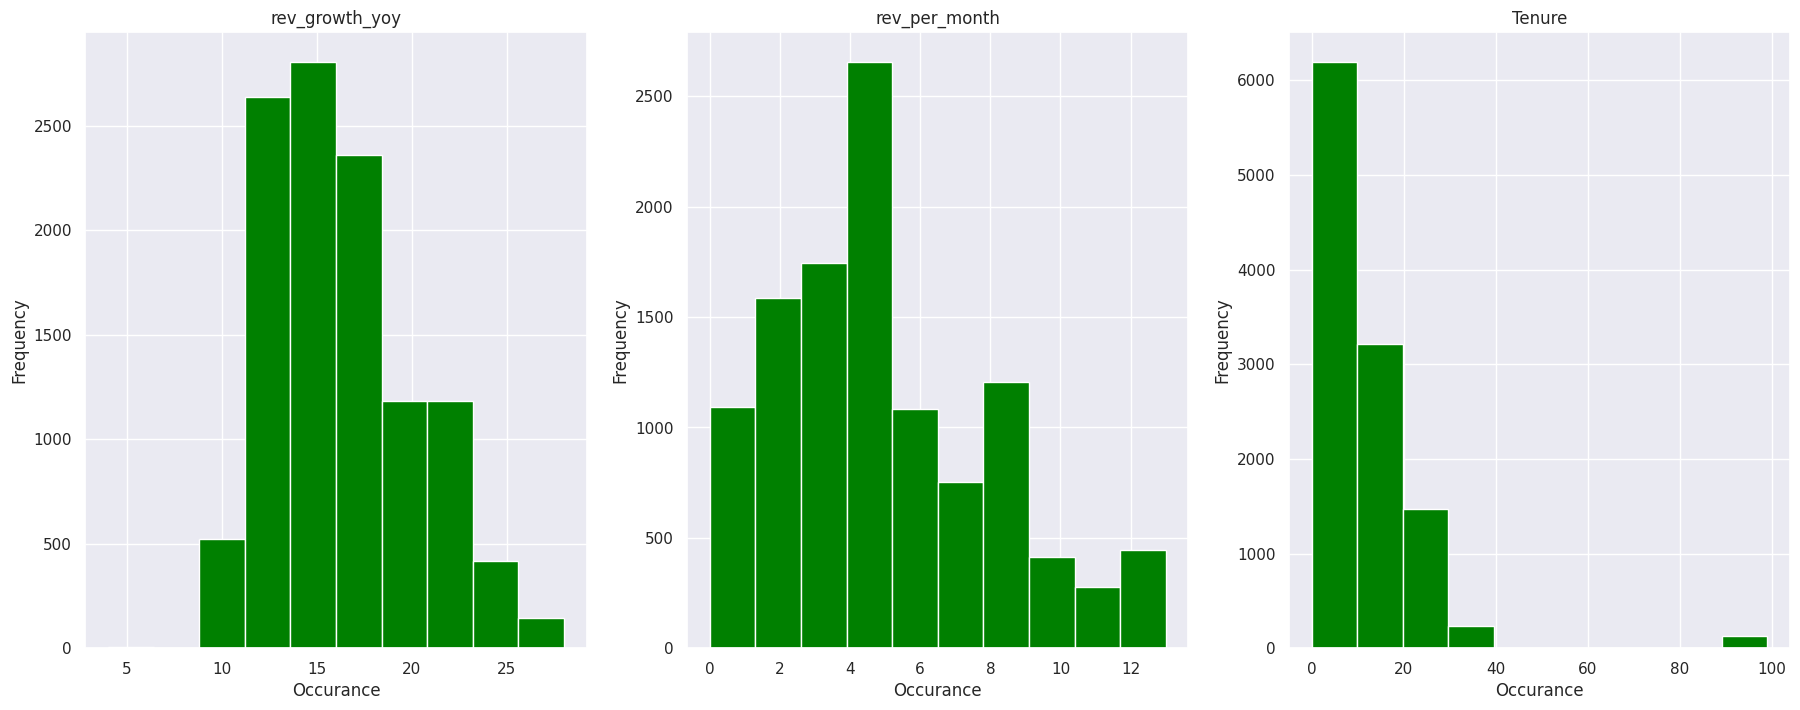

In [75]:
fig = plt.figure()
fig,axes1 = plt.subplots(nrows = 1, ncols =3, figsize = (22,8));

axes1[0].set(xlabel = "Occurance",
        ylabel = "Frequency",
        title = "rev_growth_yoy");
axes1[0].hist(df1.rev_growth_yoy,color ="Green");

axes1[1].set(xlabel = "Occurance",
        ylabel = "Frequency",
        title = "rev_per_month");
axes1[1].hist(df1.rev_per_month,color ="Green");

axes1[2].set(xlabel = "Occurance",
        ylabel = "Frequency",
        title = "Tenure");
axes1[2].hist(df1.Tenure,color ="Green");

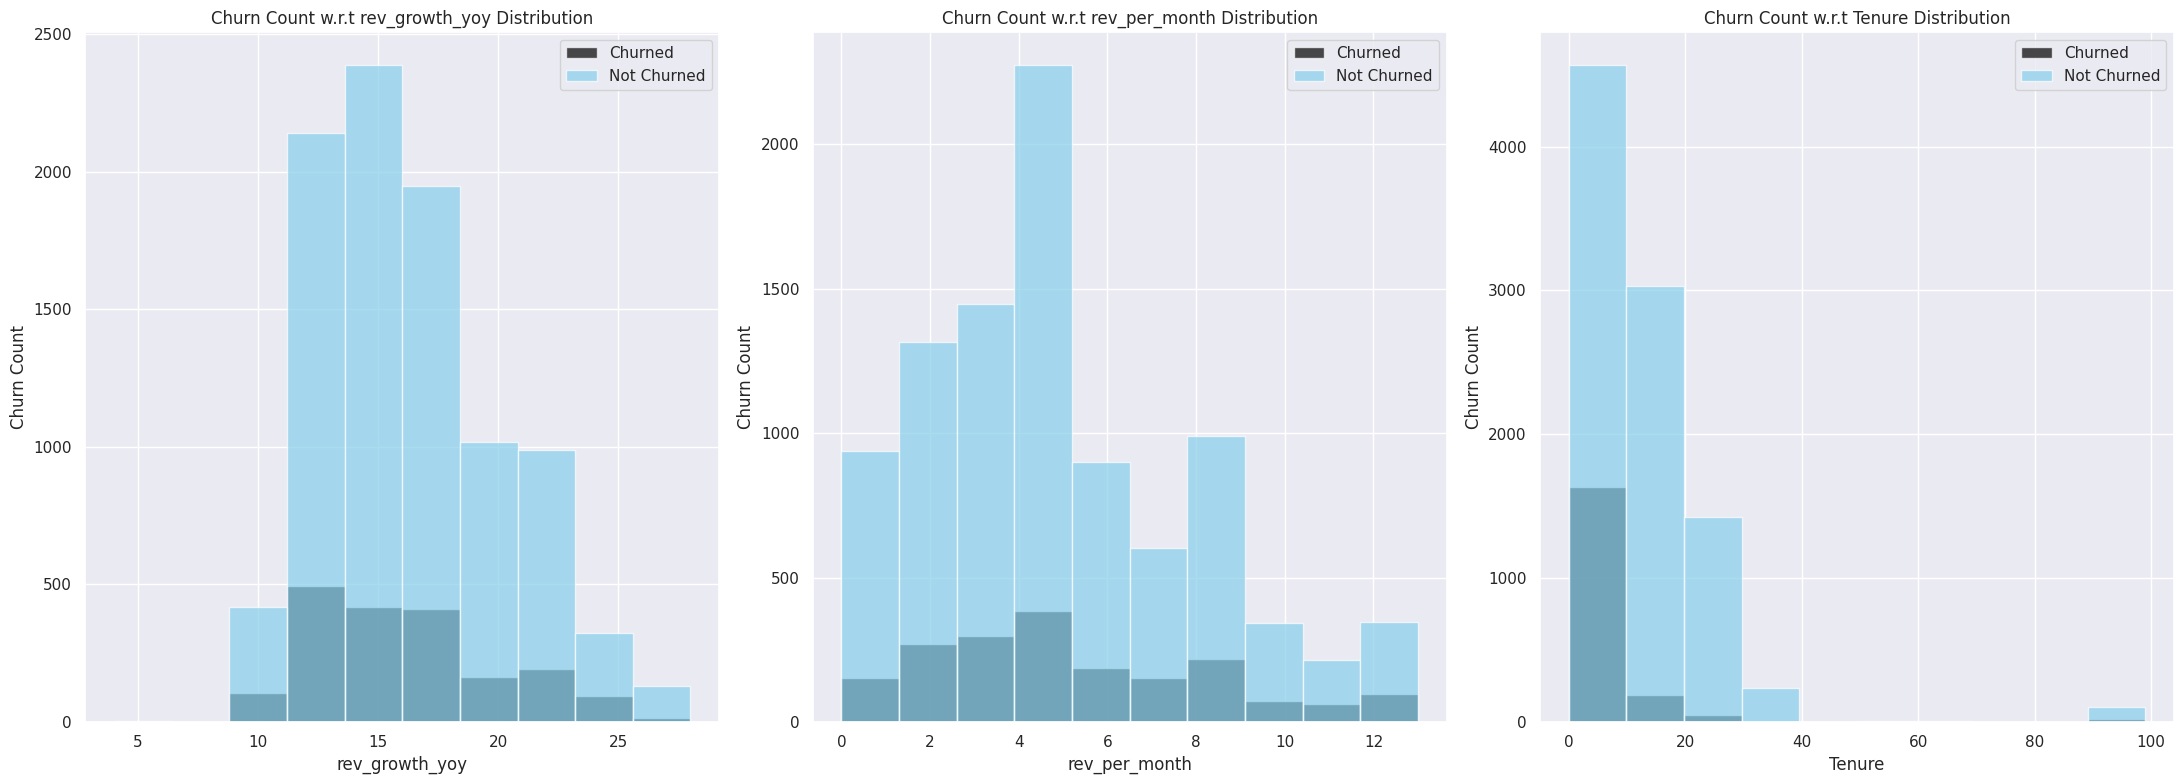

In [76]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df1'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 8))

# Colors for churn categories
churned_color = 'black'
not_churned_color = 'skyblue'
alpha_base = 0.7  # Base transparency for histograms

# Generate histograms for rev_growth_yoy (consider separating churned and non-churned)
axes[0].hist(df1[df1['Churn'] == 1]['rev_growth_yoy'], color=churned_color, alpha=alpha_base, label='Churned')
axes[0].hist(df1[df1['Churn'] == 0]['rev_growth_yoy'], color=not_churned_color, alpha=alpha_base, label='Not Churned')
axes[0].set_xlabel("rev_growth_yoy")
axes[0].set_ylabel("Churn Count")
axes[0].set_title("Churn Count w.r.t rev_growth_yoy Distribution")
axes[0].legend()

# Repeat for rev_per_month and Tenure (consider separating churned and non-churned)
axes[1].hist(df1[df1['Churn'] == 1]['rev_per_month'], color=churned_color, alpha=alpha_base, label='Churned')
axes[1].hist(df1[df1['Churn'] == 0]['rev_per_month'], color=not_churned_color, alpha=alpha_base, label='Not Churned')
axes[1].set_xlabel("rev_per_month")
axes[1].set_ylabel("Churn Count")
axes[1].set_title("Churn Count w.r.t rev_per_month Distribution")
axes[1].legend()

axes[2].hist(df1[df1['Churn'] == 1]['Tenure'], color=churned_color, alpha=alpha_base, label='Churned')
axes[2].hist(df1[df1['Churn'] == 0]['Tenure'], color=not_churned_color, alpha=alpha_base, label='Not Churned')
axes[2].set_xlabel("Tenure")
axes[2].set_ylabel("Churn Count")
axes[2].set_title("Churn Count w.r.t Tenure Distribution")
axes[2].legend()

plt.tight_layout()
plt.show()

We observe the following from above graphs:

- The YoY_Revenue_Growth ranging between 10 - 20 dollars indicates most of users are average-spenders who has churned the most.
- The customers who are willing to pay between 1 - 6 dollars on the monthly basis are the one who has churned the most and also business  maximum revenue growth arrives from these set of customers
- maximum tenurity of accounts lasts between 0-20 months. This indicates most customers are seasonal users.

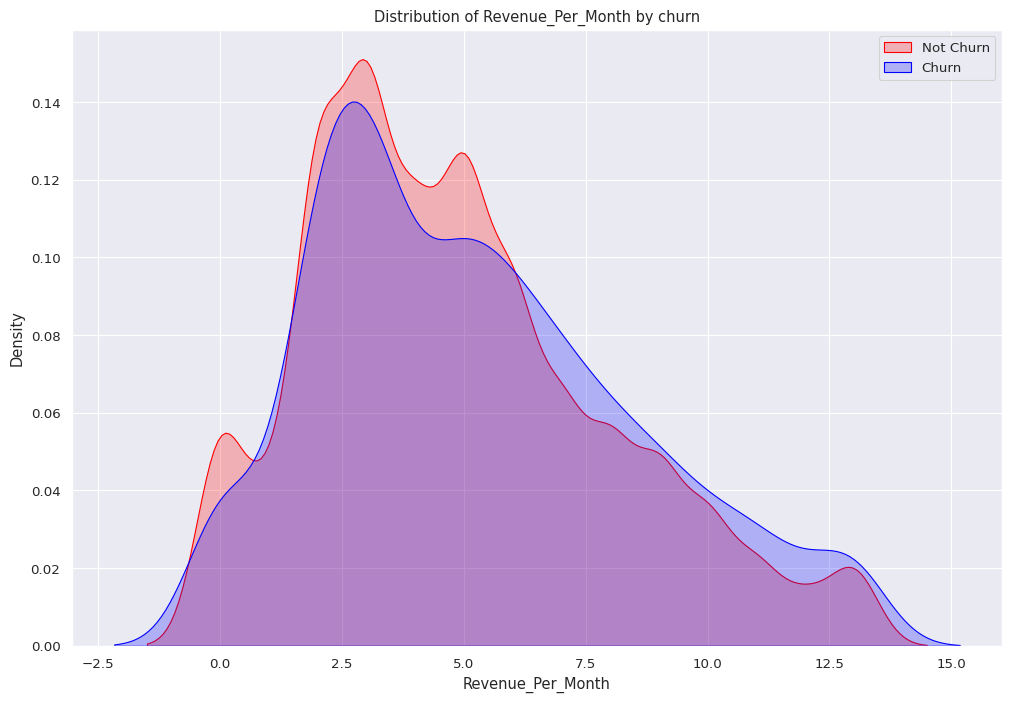

In [77]:
# These graphs shows clear trend between churned and non-churned accounts and it's range
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.rev_per_month[(df1["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df1.rev_per_month[(df1["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Revenue_Per_Month');
ax.set_title('Distribution of Revenue_Per_Month by churn');

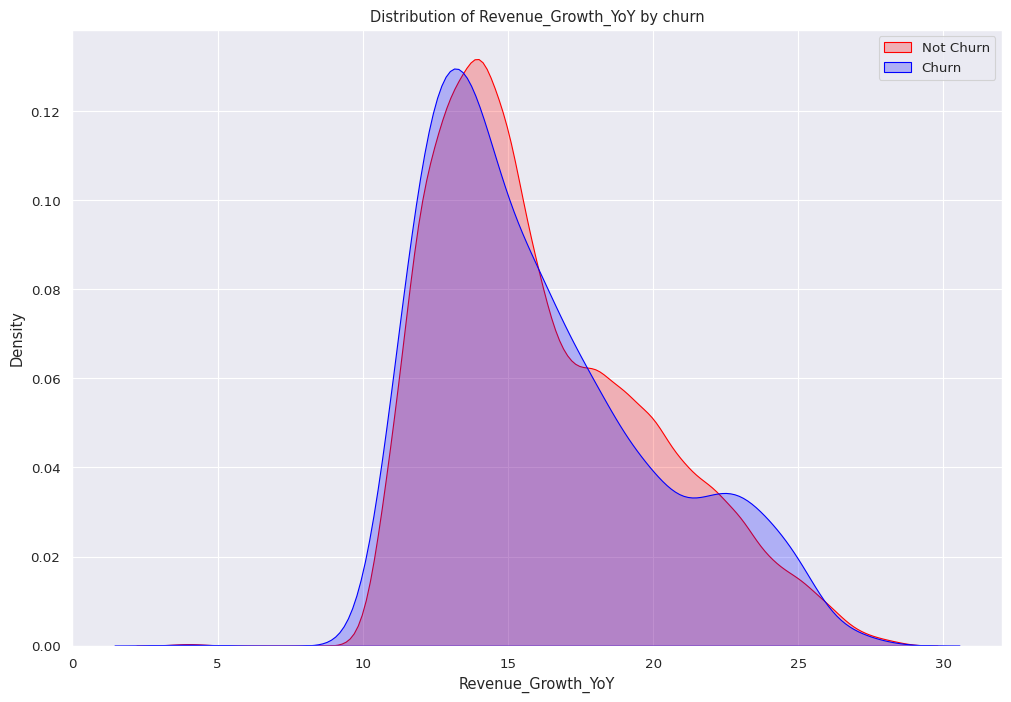

In [78]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.rev_growth_yoy[(df1["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df1.rev_growth_yoy[(df1["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Revenue_Growth_YoY');
ax.set_title('Distribution of Revenue_Growth_YoY by churn');

In [79]:
# Outliers Check using boxplot if required

# fig = plt.figure()
# fig,axes1 = plt.subplots(nrows = 1, ncols = 2, figsize = (22,5));
# axes1[0].set(
#         title = "Tenure");
# axes1[0].boxplot(df1.Tenure);

In [80]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df1['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df1['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=15, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=15, showarrow=False)])
fig.show()

- Customers are 39.5 % female and 60.5 % male.
- 16.8% of customers are churned.

> Add blockquote



In [81]:
df1["Churn"][df["Churn"]==0].groupby(by=df1["Gender"]).count()

Gender
F    3759
M    5605
Name: Churn, dtype: int64

In [82]:
df1["Churn"][df["Churn"]==1].groupby(by=df1["Gender"]).count()

Gender
F     689
M    1207
Name: Churn, dtype: int64

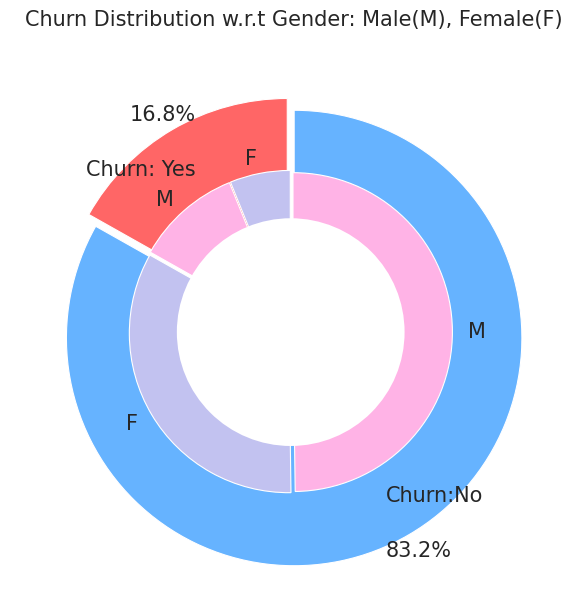

In [83]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1896,9364]
labels_gender = ["F","M","F","M"]
sizes_gender = [689,1207, 3759,5605]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [84]:
labels = df1['Payment'].unique()
values = df1['Payment'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [85]:
fig = px.histogram(df1, x="Churn", color="Payment", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Majority prefer to do transaction through Debit card or UPI.
- Among 16.8% of churned Accounts, Debit Card and Credit Card users seems to be most disaticified

*   List item
*   List item



In [86]:
 df1[df1["Gender"]=="M"][["Gender","account_segment", "Churn"]].value_counts()

Gender  account_segment  Churn
M       Super            0        2130
        Regular Plus     0        1963
        HNI              0         779
        Regular Plus     1         725
        Super Plus       0         398
        Regular          0         335
        Super            1         275
        HNI              1         159
        Super Plus       1          32
        Regular          1          16
Name: count, dtype: int64

In [87]:
df1[df1["Gender"]=="F"][["Gender","account_segment", "Churn"]].value_counts()

Gender  account_segment  Churn
F       Super            0        1516
        Regular Plus     0        1113
        HNI              0         605
        Regular Plus     1         420
        Super Plus       0         380
        Regular          0         145
        Super            1         141
        HNI              1          96
        Regular          1          24
        Super Plus       1           8
Name: count, dtype: int64

In [88]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [1516, 2130, 141, 275],
  name = 'Super',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [1113, 1963,420, 725],
  name = 'Regular Plus',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [380, 398, 8, 32],
  name = 'Super Plus',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [605, 779, 96, 159],
  name = 'HNI',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [23, 56, 7, 11],
  name = 'M',
))


fig.update_layout(title_text="<b>Churn Distribution w.r.t. Account Segments and Gender</b>")

fig.show()

- A lot of customers choose the Regular Plus Accounts and it's also evident that the customers who use Regular Plus Accounts have high churn rate, this might suggest a dissatisfaction with this type of Accounts.
- Customers having Super Accounts are majority in number and have less churn rate compared to Regular Plus Accounts.These are most loyal customers

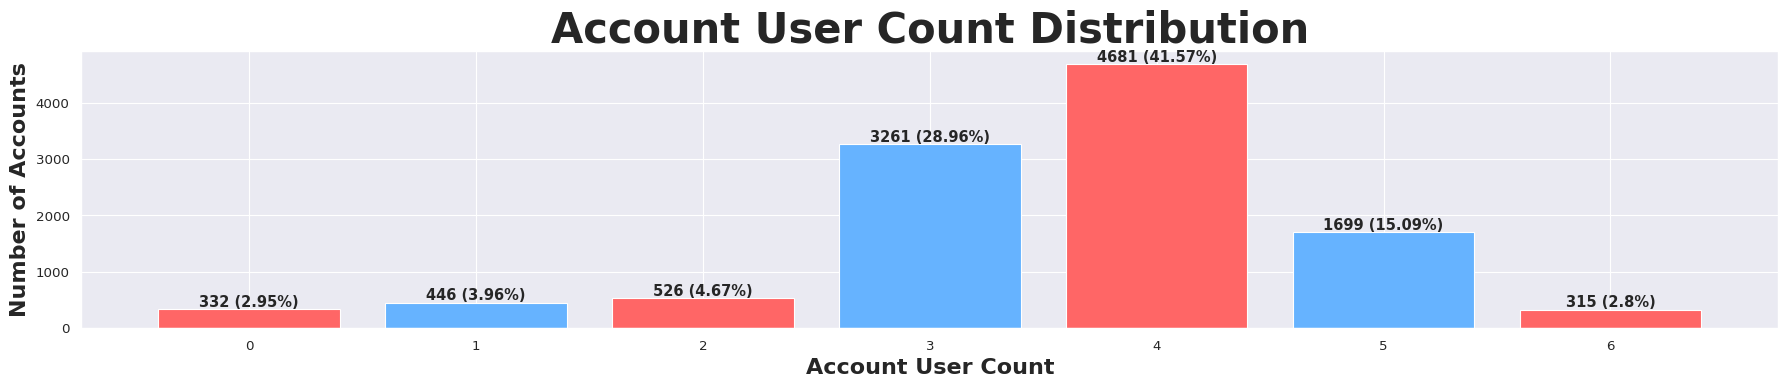

In [89]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame

# Get unique user counts and their corresponding counts
user_counts = df1['Account_user_count'].value_counts().sort_index(ascending=False)

# Extract counts and percentages (assuming total count for percentage calculation)
counts = user_counts.values
total_count = user_counts.sum()
percentages = [round(count / total_count * 100, 2) for count in counts]  # Calculate percentages with 2 decimal places

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 4))  # Create a figure and single axis
bars = ax.bar(user_counts.index, counts, color=colors)  # Plot bars using user counts as x-axis

# Customize data labels (combine count and percentage)
data_labels = [f"{count} ({p}%)" for count, p in zip(counts, percentages)]  # Combine count and percentage with formatting
ax.bar_label(bars, data_labels,fontweight='bold')  # Add labels with padding

# Customize the chart
ax.set_xlabel("Account User Count",fontsize=16, fontweight='bold')
ax.set_ylabel("Number of Accounts",fontsize=16, fontweight='bold')
ax.set_title("Account User Count Distribution",fontsize=30, fontweight='bold')
#ax.set_xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing to avoid label clipping
plt.show()



color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df1, x="Churn", color="Account_user_count", barmode="group", title="<b>Account_user_count Churn Distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

We see mix impact among the account users attributing to churn. However,maximum account has users count ranging between 3-5. therefore, maximum churn also drives from similar set of accounts.


In [90]:
labels = df1['City_Tier'].unique()
values = df1['City_Tier'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>City Tier Wise Customer Base</b>")
fig.show()


fig = px.histogram(df1, x="Churn", color="City_Tier", title="<b>City Tier Wise Customer Base distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

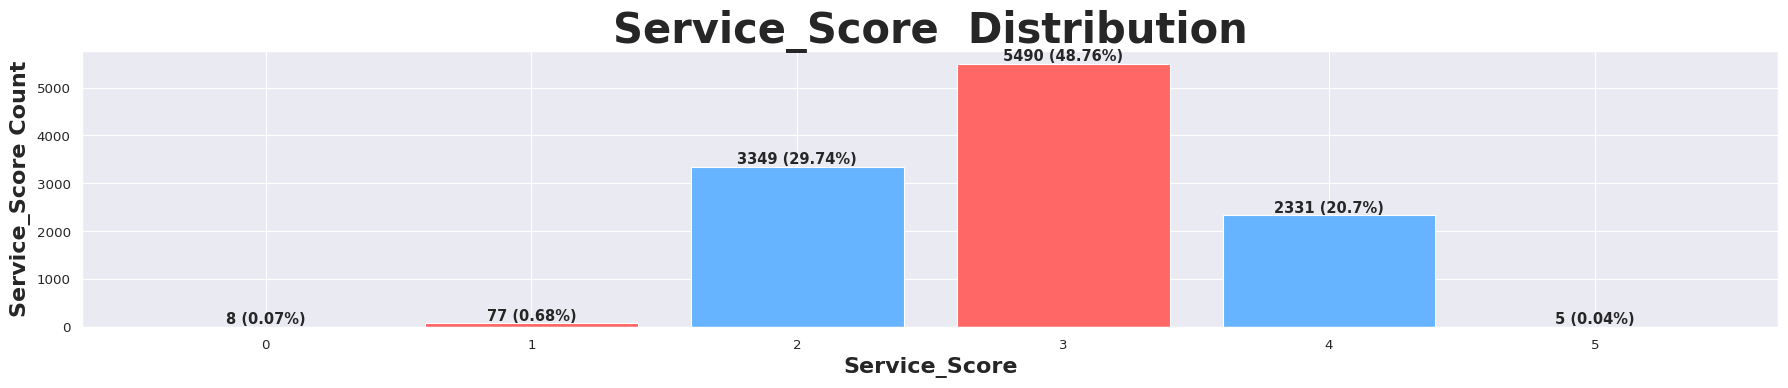

In [91]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame

# Get unique user counts and their corresponding counts
user_counts = df1['Service_Score'].value_counts().sort_index(ascending=False)

# Extract counts and percentages (assuming total count for percentage calculation)
counts = user_counts.values
total_count = user_counts.sum()
percentages = [round(count / total_count * 100, 2) for count in counts]  # Calculate percentages with 2 decimal places

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 4))  # Create a figure and single axis
bars = ax.bar(user_counts.index, counts, color=colors)  # Plot bars using user counts as x-axis

# Customize data labels (combine count and percentage)
data_labels = [f"{count} ({p}%)" for count, p in zip(counts, percentages)]  # Combine count and percentage with formatting
ax.bar_label(bars, data_labels,fontweight='bold')  # Add labels with padding

# Customize the chart
ax.set_xlabel("Service_Score",fontsize=16, fontweight='bold')
ax.set_ylabel("Service_Score Count",fontsize=16, fontweight='bold')
ax.set_title("Service_Score  Distribution",fontsize=30, fontweight='bold')
#ax.set_xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing to avoid label clipping
plt.show()



color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df1, x="Churn", color="Service_Score", barmode="group", title="<b>Service_Score By Churn Distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

68% of the customers are saticified with the overall service by rating between 3 - 4 ( Neutral). However, it's the same set customer who have churned the most.This shows that Change in compitators strategy is diverting customer base.


In [92]:
 df1[df1["Gender"]=="M"][["Marital_Status", "Churn"]].value_counts()

Marital_Status  Churn
Married         0        3194
Single          0        1462
Divorced        0         838
Single          1         579
Married         1         457
Divorced        1         152
Unknown         0         111
                1          19
Name: count, dtype: int64

In [93]:
 df1[df1["Gender"]=="F"][["Marital_Status", "Churn"]].value_counts()

Marital_Status  Churn
Married         0        1993
Single          0        1111
Divorced        0         586
Single          1         368
Married         1         216
Divorced        1          92
Unknown         0          69
                1          13
Name: count, dtype: int64

In [94]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [1993, 3194, 216, 457],
  name = 'Married',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [1111, 1462, 268, 579],
  name = 'Single',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 92, 152],
  name = 'Divorced',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [69, 111, 13, 19],
  name = 'Unknown',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Marital_Status and Gender</b>")

fig.show()

In [95]:
labels = df1['Login_device'].unique()
values = df1['Login_device'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Login_device Wise Customer Base</b>")
fig.show()


fig = px.histogram(df1, x="Churn", color="Login_device", title="<b>Login_device Wise Customer Base distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Majority access the account on Mobile Device and those are users who have churned the most




### Feature Selection Used for Churn Prediction:

- Correlation Coefficient: Measures the linear relationship between two numerical features. High positive or negative correlation might suggest redundancy, and one of the features can be removed.

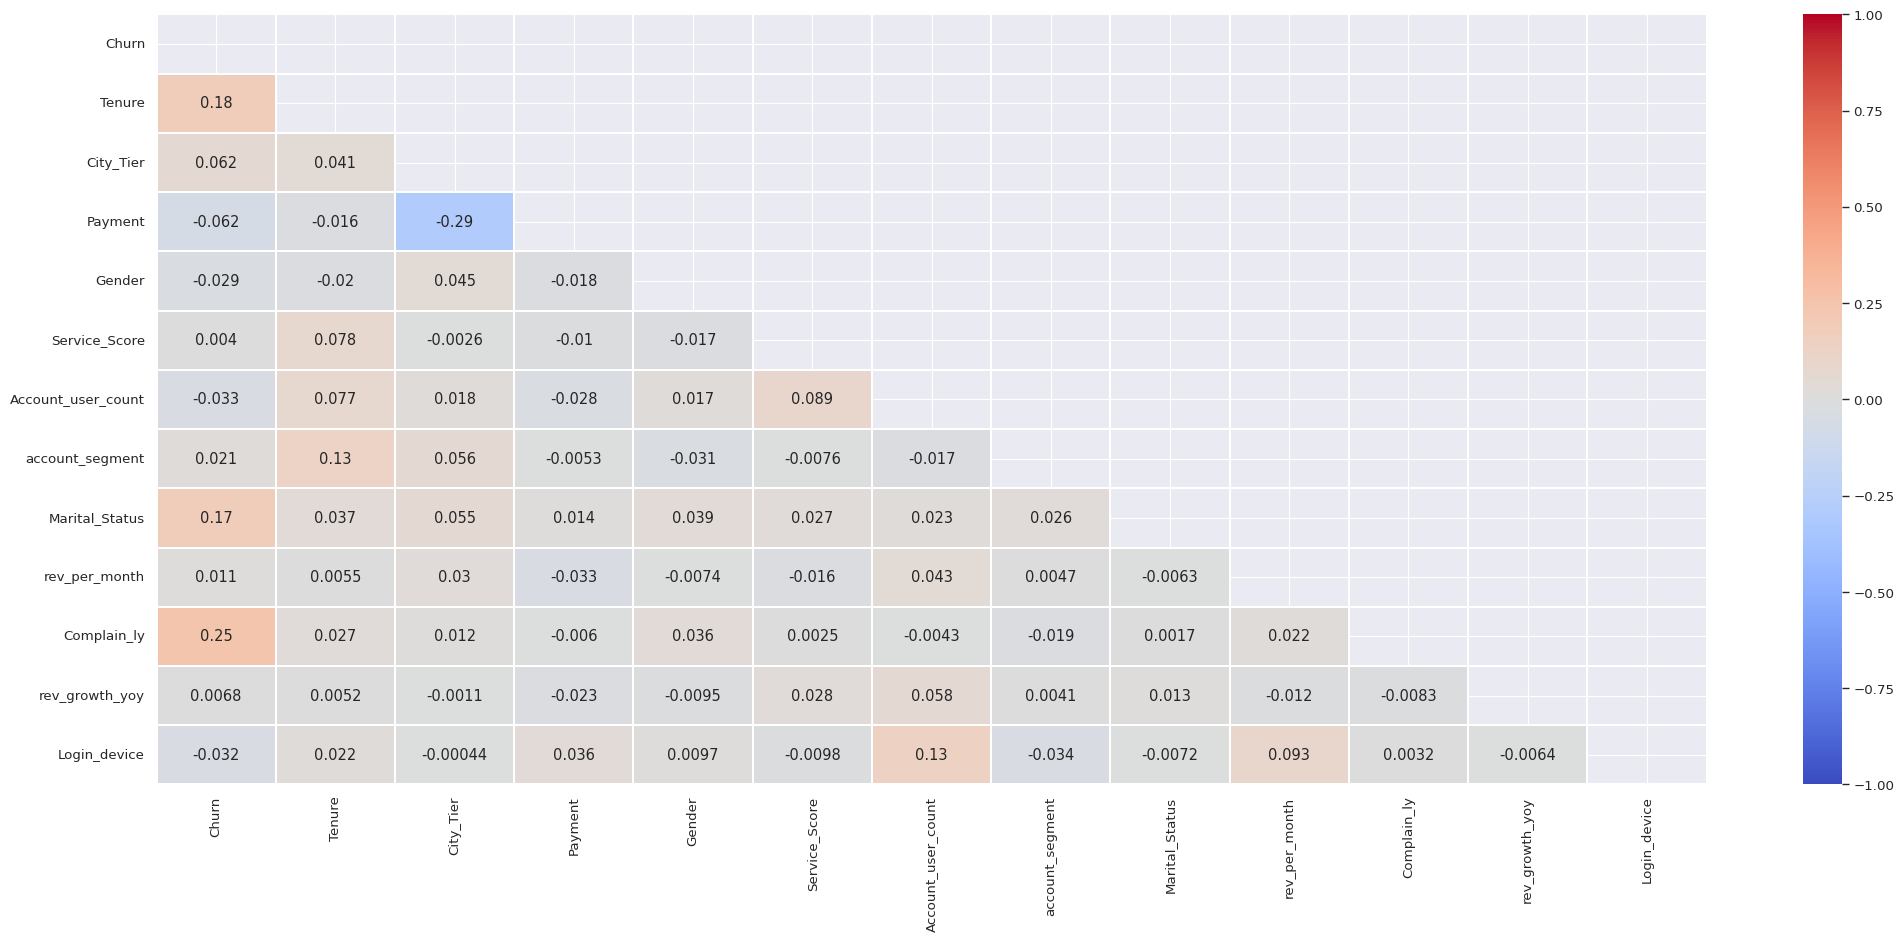

In [96]:
plt.figure(figsize=(25, 10))

corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Indicates no strong correlation among any of the features that leads to multicollinearity.

 ## Data Transformation


 ### Feature Engineering/Encoding techniques :

#### 1.  Label Encoding
Description: Assigns a unique integer to each category.
Use Case: Suitable for ordinal data where the order of categories is meaningful.
Example:
Categories: [Red, Green, Blue]
Encoded: [0, 1, 2]
#### 2. One-Hot Encoding
Description: Converts each category into a new binary column, indicating the presence (1) or absence (0) of the category.
Use Case: Suitable for nominal data where the order of categories is not meaningful.
Example:
Categories: [Red, Green, Blue]
Encoded: [Red: [1, 0, 0], Green: [0, 1, 0], Blue: [0, 0, 1]]
#### 3. Binary Encoding
Description: Combines label encoding and binary transformation. First, the category is label encoded, then the integer is converted into binary digits.
Use Case: Reduces the dimensionality compared to one-hot encoding while handling high cardinality categorical data.
Example:
Categories: [A, B, C, D]
Label Encoded: [0, 1, 2, 3]
Binary Encoded: [0: [0, 0], 1: [0, 1], 2: [1, 0], 3: [1, 1]]
#### 4. Ordinal Encoding
Description: Assigns an integer to each category based on some order.
Use Case: Used when the categorical data has an inherent order.
Example:
Categories: [Low, Medium, High]
Encoded: [0, 1, 2]
#### 5. Frequency Encoding
Description: Replaces categories with the frequency of their occurrences.
Use Case: Useful when the frequency of a category carries important information.
Example:
Categories: [A, B, B, C, C, C]
Encoded: [A: 1, B: 2, C: 3]
#### 6. Target Encoding (Mean Encoding)
Description: Replaces categories with the mean of the target variable for each category.
Use Case: Often used in regression tasks or for features with high cardinality.
Example:
Categories: [A, B, C]
Target: [10, 20, 30, 40, 50]
Encoded: [A: mean(target|A), B: mean(target|B), C: mean(target|C)]
#### 7. Leave-One-Out Encoding
Description: Similar to target encoding but excludes the current row's target value when calculating the mean.
Use Case: Reduces overfitting compared to target encoding.
Example:
Categories: [A, B, C]
Target: [10, 20, 30, 40, 50]
Encoded: [A: mean(target excluding current row|A), B: mean(target excluding current row|B), C: mean(target excluding current row|C)]
#### 8. Hashing Encoding
Description: Uses a hash function to convert categories to a fixed number of columns.
Use Case: Useful for high cardinality features when you want to control the dimensionality.
Example:
Categories: [A, B, C, D]
Encoded using hash function: [0, 1, 0, 1] (hashed to 2 columns)
#### 9. Polynomial (Interaction) Encoding
Description: Creates interaction features between categorical variables.
Use Case: Used to capture interactions between categorical features.
Example:
Categories: [A, B], [X, Y]
Encoded: [AX, AY, BX, BY]
#### 10. Feature Hashing (The Hashing Trick)
Description: Uses a hash function to map categories to a vector of a fixed dimension.
Use Case: Suitable for very high cardinality features, as it reduces dimensionality while allowing for collisions.
Example:
Categories: [A, B, C, D]
Encoded (hashed): [0, 1, 1, 0] (hashed to a fixed dimension)


### Feature Scaling

#### Normalization (Min-Max Scaling)
Description: Scales the data to a fixed range, typically [0, 1] or [-1, 1].
Formula: 𝑋norm= 𝑋 − 𝑋min / 𝑋max − 𝑋min

Use Cases:
When Feature Magnitudes Vary Significantly: If the features have different scales and magnitudes, normalization ensures that each feature contributes equally to the model.
When Using Distance-Based Algorithms: Algorithms like k-Nearest Neighbors (k-NN) and neural networks (especially those using sigmoid or tanh activation functions) benefit from normalized data.
When Data Does Not Follow a Gaussian Distribution: If the data does not resemble a normal distribution, normalization can be more effective than standardization.
When You Need a Bounded Range: Some algorithms require input features to be within a specific range, making normalization necessary.


#### Standardization (Z-Score Scaling):

Description: Centers the data around the mean with a unit standard deviation. It scales the date between [-Infinity and +Infinity]. he data distributed across the scale will have mean of 0 and standard devaition of 1

Formula:
𝑋std= 𝑋 − 𝜇/ 𝜎

where
μ is the mean and
σ is the standard deviation.


Use Cases:
When Data Follows a Gaussian Distribution: If the data is approximately normally distributed, standardization can center the data and normalize variances.
When Using Linear Models: Algorithms like linear regression, logistic regression, and linear discriminant analysis (LDA) often perform better with standardized data.
When Using Regularized Models: Models that include regularization (like Ridge and Lasso regression) benefit from features that are standardized.
When Dealing with Outliers: Standardization is less sensitive to outliers compared to normalization. Outliers can heavily influence min-max scaling, whereas z-score scaling distributes the effect more evenly.


###### Summary of When to Use Each:

Normalization:

When using algorithms that rely on distance or require a specific input range.
When features have different scales and need to be on the same scale.
When data does not follow a normal distribution.


Standardization:

When using linear models or models that assume normality in the data.
When regularization techniques are applied.
When the data is normally distributed or close to it.
When the presence of outliers is less of a concern.

In [97]:
df_encoded = df1.copy()


In [98]:
df_encoded.dtypes

Churn                  int64
Tenure                 int64
City_Tier              int64
Payment               object
Gender                object
Service_Score          int64
Account_user_count     int64
account_segment       object
Marital_Status        object
rev_per_month          int64
Complain_ly            int64
rev_growth_yoy         int64
Login_device          object
dtype: object

In [99]:
import pandas as pd

# Assuming your DataFrame is named 'df2'

# One-hot encode with dummy encoding (0, 1) and specify data type
df_encoded = pd.get_dummies(df1, columns=['Gender','Login_device','Marital_Status'], drop_first=True)

df_encoded  # View the first few rows


,Churn,Tenure,City_Tier,Payment,Service_Score,Account_user_count,account_segment,rev_per_month,Complain_ly,rev_growth_yoy,Gender_M,Login_device_Computer,Login_device_Mobile,Login_device_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,4,3,Debit Card,3,3,Super,9,1,11,False,False,True,False,False,True,False
1,1,0,1,UPI,3,4,Regular Plus,7,1,15,True,False,True,False,False,True,False
2,1,0,1,Debit Card,2,4,Regular Plus,6,1,14,True,False,True,False,False,True,False
3,1,0,3,Debit Card,2,4,Super,8,0,23,True,False,True,False,False,True,False
4,1,0,1,Credit Card,2,3,Regular Plus,3,0,11,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0,10,1,Credit Card,3,2,Super,9,0,19,True,True,False,False,True,False,False
11256,0,13,1,Credit Card,3,5,HNI,7,0,16,True,False,True,False,True,False,False
11257,0,1,1,Debit Card,3,2,Super,7,1,22,True,False,True,False,True,False,False
11258,0,23,3,Credit Card,4,5,Super,7,0,16,True,True,False,False,True,False,False


In [100]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df_encoded['Payment'] = encoder.fit_transform(df_encoded['Payment'])
df_encoded['account_segment'] = encoder.fit_transform(df_encoded['account_segment'])
df_encoded

,Churn,Tenure,City_Tier,Payment,Service_Score,Account_user_count,account_segment,rev_per_month,Complain_ly,rev_growth_yoy,Gender_M,Login_device_Computer,Login_device_Mobile,Login_device_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,4,3,2,3,3,3,9,1,11,False,False,True,False,False,True,False
1,1,0,1,4,3,4,2,7,1,15,True,False,True,False,False,True,False
2,1,0,1,2,2,4,2,6,1,14,True,False,True,False,False,True,False
3,1,0,3,2,2,4,3,8,0,23,True,False,True,False,False,True,False
4,1,0,1,1,2,3,2,3,0,11,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0,10,1,1,3,2,3,9,0,19,True,True,False,False,True,False,False
11256,0,13,1,1,3,5,0,7,0,16,True,False,True,False,True,False,False
11257,0,1,1,2,3,2,3,7,1,22,True,False,True,False,True,False,False
11258,0,23,3,1,4,5,3,7,0,16,True,True,False,False,True,False,False


#### Payment : Lable Encoding Order
Debit - 2 Credit - 1 UPI - 4 Cash ON delivery - 0 Unknown - 5 Ewallet - 3

#### Account_segment : Lable Encoding Order
Super - 3 Regular - 1 HNI - 0 Super Plus - 4 Regular Plus - 2


In [101]:
# Feature Scaling Tecniques
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()
df_encoded['Tenure'] = scaler.fit_transform(df_encoded[['Tenure']])

df_encoded[['rev_per_month', 'rev_growth_yoy']] = scaler.fit_transform(df_encoded[['rev_per_month', 'rev_growth_yoy']])

In [102]:
pip install xgboost lightgbm catboost

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2809
           1       0.73      0.31      0.43       569

    accuracy                           0.86      3378
   macro avg       0.80      0.64      0.68      3378
weighted avg       0.85      0.86      0.84      3378

ROC-AUC: 0.8349167657810915


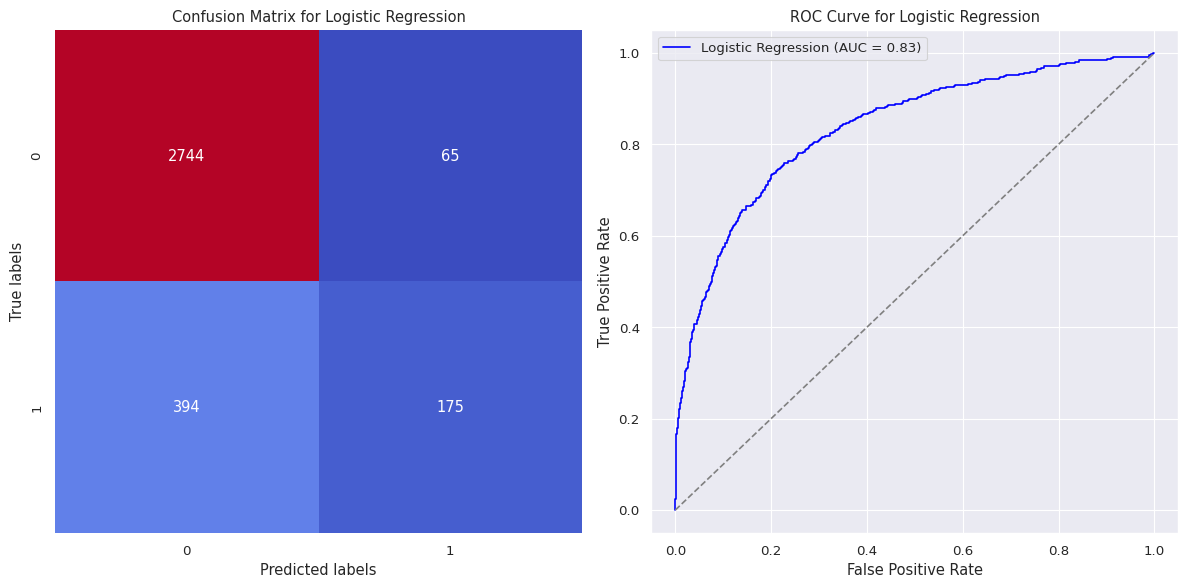

------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2809
           1       0.79      0.85      0.82       569

    accuracy                           0.94      3378
   macro avg       0.88      0.90      0.89      3378
weighted avg       0.94      0.94      0.94      3378

ROC-AUC: 0.9037518120577781


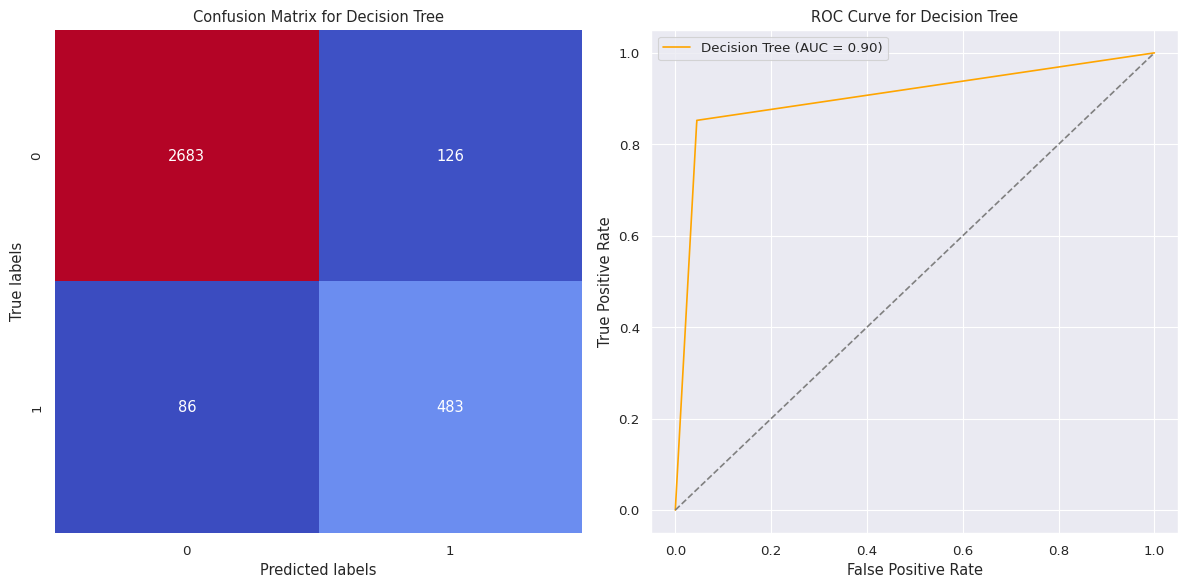

------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.90      0.80      0.85       569

    accuracy                           0.95      3378
   macro avg       0.93      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378

ROC-AUC: 0.9825829730072995


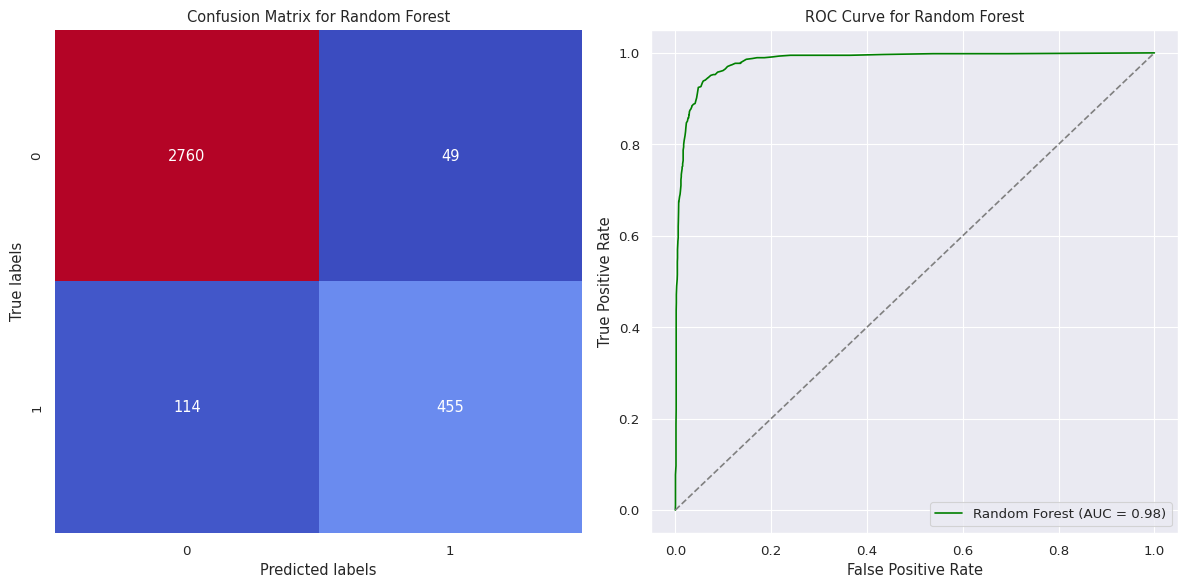

------------------------------------------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.76      0.57      0.65       569

    accuracy                           0.90      3378
   macro avg       0.84      0.77      0.80      3378
weighted avg       0.89      0.90      0.89      3378

ROC-AUC: 0.910152904203849


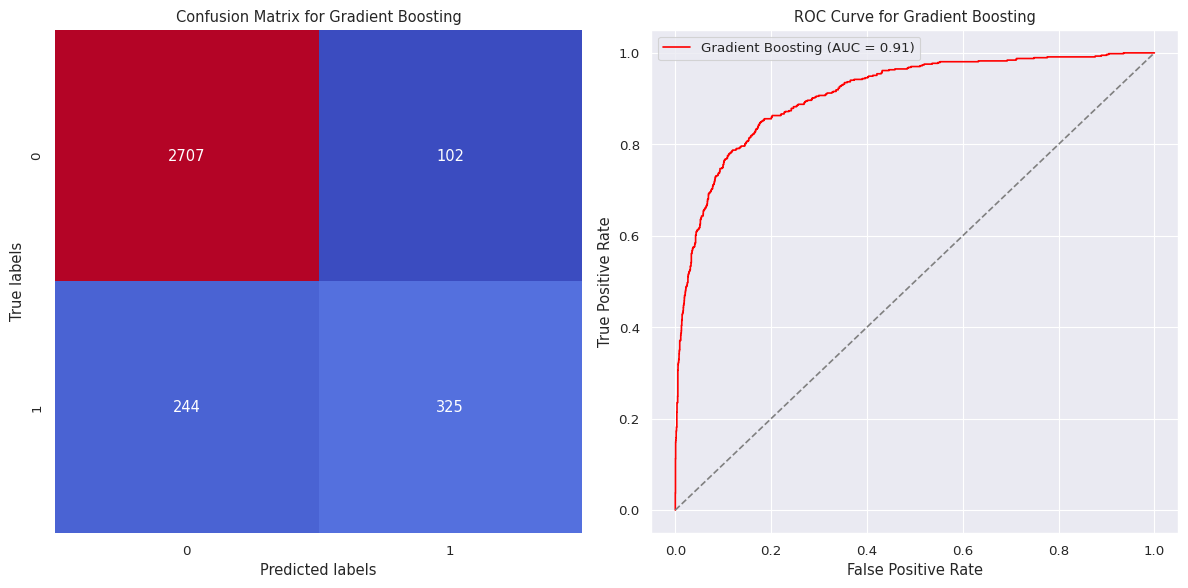

------------------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2809
           1       0.85      0.80      0.83       569

    accuracy                           0.94      3378
   macro avg       0.91      0.89      0.90      3378
weighted avg       0.94      0.94      0.94      3378

ROC-AUC: 0.9776061879935257


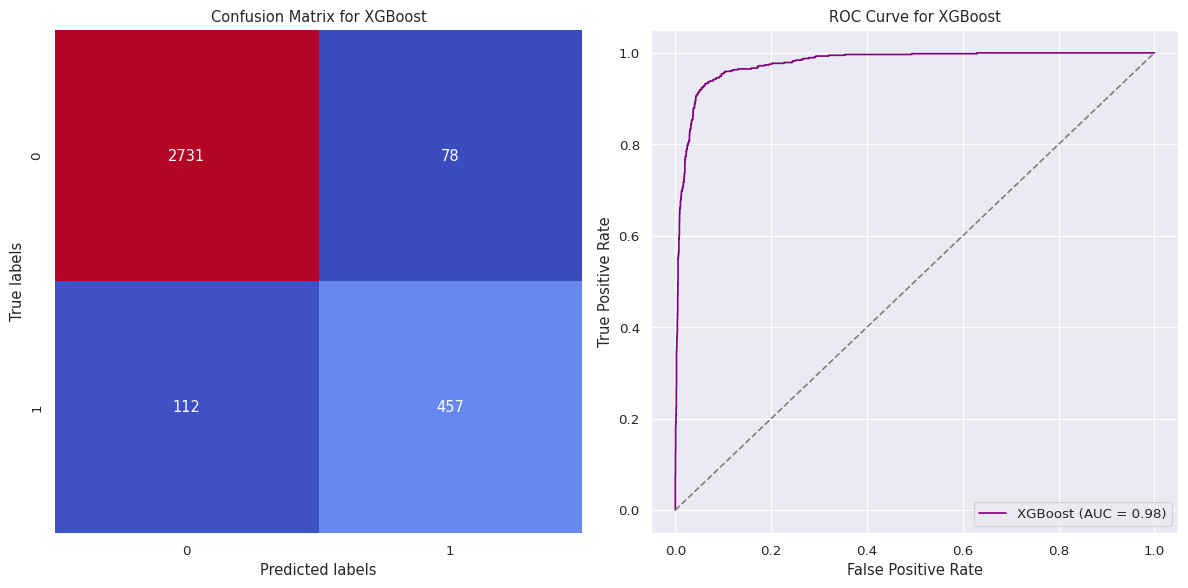

------------------------------------------------------------
[LightGBM] [Info] Number of positive: 1327, number of negative: 6555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 7882, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168358 -> initscore=-1.597307
[LightGBM] [Info] Start training from score -1.597307
Model: LightGBM
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2809
           1       0.84      0.72      0.77       569

    accuracy                           0.93      3378
   macro avg       0.89      0.85      0.87      3378
weighted avg       0.93      0.93      0.93      3378

ROC-AUC: 0.9673945346397876


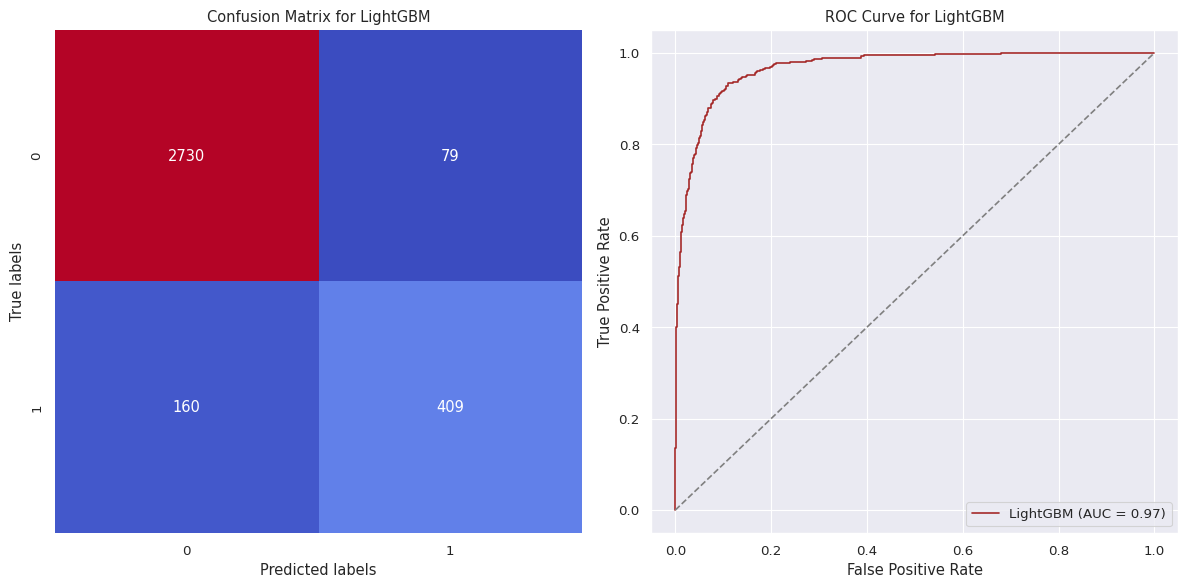

------------------------------------------------------------
Model: CatBoost
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2809
           1       0.86      0.70      0.77       569

    accuracy                           0.93      3378
   macro avg       0.90      0.84      0.87      3378
weighted avg       0.93      0.93      0.93      3378

ROC-AUC: 0.965516939338218


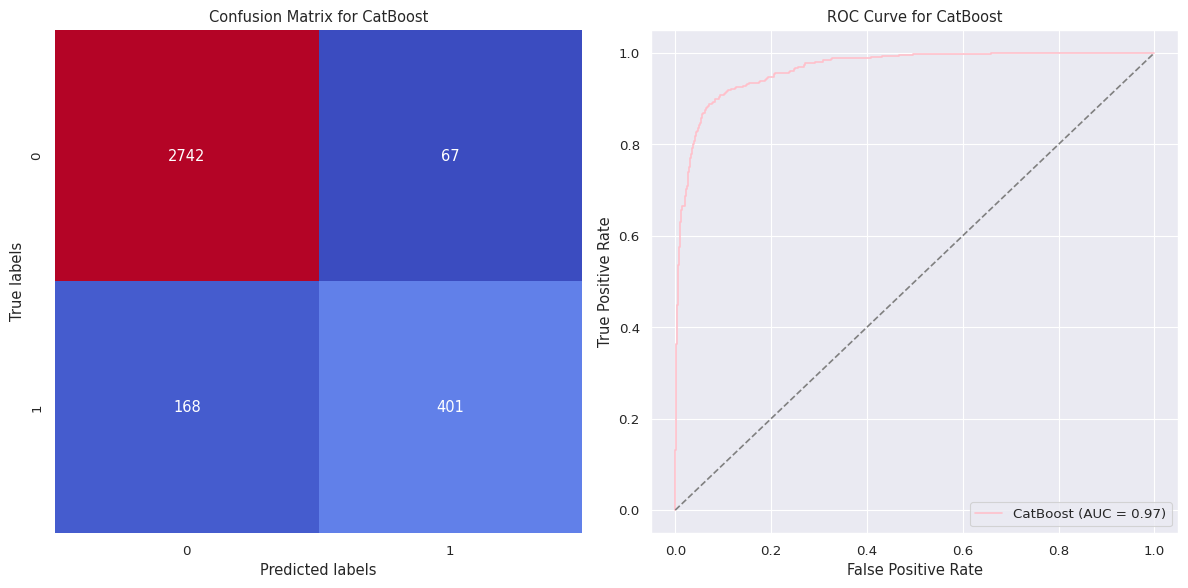

------------------------------------------------------------


In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading
# df = pd.read_csv('churn_data.csv')

# Assume df is your DataFrame and 'Churn' is your target variable
x = df_encoded.drop(["Churn"], axis = 1)
y = df_encoded["Churn"]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234, stratify=y)

# Define colors for each model
model_colors = {
    'Logistic Regression': 'blue',
    'Decision Tree': 'orange',
    'Random Forest': 'green',
    'Gradient Boosting': 'red',
    'XGBoost': 'purple',
    'LightGBM': 'brown',
    'CatBoost': 'pink'
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # verbose=0 to suppress output
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba)}")

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix with varied colors
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("coolwarm", as_cmap=True), cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})", color=model_colors[name])
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {name}")
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("-" * 60)
